### Possible next steps...

- **Descriptive Analysis**: Start with a broad overview. Calculate basic statistics (mean, median, standard deviation, etc.) for each category and stat type. This will give you a sense of the data's central tendencies and variability. Visualize these stats through histograms, box plots, and density plots to understand the distribution of each statistic.

- **Correlation Analysis**: Investigate how different stats correlate with winning percentage and each other. This could help identify key factors contributing to a team's success. Heatmaps and scatter plots are great for visualizing these relationships.

- **Trend Analysis**: Analyze trends over the years. This could involve looking at how the importance of certain stats (like three-point shooting or turnovers) has evolved. Time series plots can be helpful here, showing how averages for significant stats have changed over time.

- **Comparative Analysis**: Compare stats between teams that have historically performed well in the tournament versus those that haven’t. This might reveal certain statistical benchmarks or thresholds that successful teams typically meet.

- **Cluster Analysis**: Use clustering techniques to group teams with similar statistical profiles. This could reveal archetypes of teams (e.g., defensive powerhouses, high-scoring teams) and how well each archetype tends to perform in the tournament.

- **Predictive Modeling**: More complex approach, building predictive models (like logistic regression for binary outcomes, or more sophisticated machine learning models) using historical data to predict tournament outcomes can be very insightful. Use your stats as features to predict outcomes such as game winners, tournament progression, or even identify potential upsets.

- **Incorporating KenPom Stats**: KenPom stats are highly regarded in college basketball analytics. Compare your findings with KenPom’s efficiency ratings, tempo, and other advanced metrics. This could validate your analysis or reveal new insights.

- **Visualization and Dashboarding**: Develop interactive dashboards using tools like Tableau, Power BI, or even Python libraries (Dash by Plotly, for instance) to make analysis accessible. This can help in exploring data dynamically, comparing teams, and identifying patterns more intuitively.

- **Narrative and Storytelling**: Use analysis to tell stories. This could involve identifying underdog teams with the potential to make deep runs, powerhouse teams that might be vulnerable, or key matchups to watch based on statistical matchups.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def createDfDict(dirPath, years, prefix):
    trny = {}
    for year in years:
        filepath = f"{dirPath}/{prefix}{year}.csv"
        trny[year] = pd.read_csv(filepath)
    return trny

In [3]:
def calcRndStats(df):
    defAvg = np.mean(df["ADE"])
    defStd = np.std(df["ADE"])
    offAvg = np.mean(df["AOE"])
    offStd = np.std(df["AOE"])

    return defAvg, defStd, offAvg, offStd

In [4]:
def calcBaselineStats(df):
    dAvg, dStd, oAvg, oStd = calcRndStats(df)
    xMin = dAvg - dStd
    xMax = dAvg + dStd
    yMin = oAvg - oStd
    yMax = oAvg + oStd
    
    return xMin, xMax, yMin, yMax

In [5]:
def calcScopedStats(df, rnd):
    dAvg, dStd, oAvg, oStd = calcRndStats(df)
    if rnd == 1:
        xMin = dAvg - (1.75 * dStd)
        xMax = dAvg + (0.5 * dStd)
        yMin = oAvg - (0.75 * oStd)
        yMax = oAvg + (2 * oStd)
    if rnd == 2 or rnd == 3:
        xMin = dAvg - (1.5 * dStd)
        xMax = dAvg + (0.75 * dStd)
        yMin = oAvg - (0.75 * oStd)
        yMax = oAvg + (2 * oStd)
    if rnd == 4:
        xMin = dAvg - dStd
        xMax = dAvg + (0.75 * dStd)
        yMin = oAvg - oStd
        yMax = oAvg + (2 * oStd)
    if rnd == 5:
        xMin = dAvg - dStd
        xMax = dAvg + (0.5 * dStd)
        yMin = oAvg - oStd
        yMax = oAvg + (2 * oStd)
    if rnd == 6:
        xMin = dAvg - dStd
        xMax = dAvg + (0.5 * dStd)
        yMin = oAvg - (0.5 * oStd)
        yMax = oAvg + oStd
        
    return xMin, xMax, yMin, yMax

In [9]:
def plotScatter(df, rnd, rndTitle):
    dAvg, _, oAvg, _ = calcRndStats(df)
    xMinB, xMaxB, yMinB, yMaxB = calcBaselineStats(df)
    xMinSc, xMaxSc, yMinSc, yMaxSc = calcScopedStats(df, rnd=rnd)
    
    _, ax = plt.subplots()

    ax.set_facecolor("slategray")
    ax.set_title(f"2014-2023 Offense/Defense Efficiencies ({rndTitle})")
    ax.set_xlabel("Adjusted Defensive Efficiency")
    ax.set_ylabel("Adjusted Offensive Efficiency")

    ax.axvline(x=(xMinSc), color="orangered", linestyle="-.", linewidth=0.625)
    ax.axvline(x=(xMaxSc), color="orangered", linestyle="-.", linewidth=0.625)
    ax.axhline(y=(yMinSc), color="orangered", linestyle="-.", linewidth=0.625)
    ax.axhline(y=(yMaxSc), color="orangered", linestyle="-.", linewidth=0.625)
    ax.fill_between(
        x=[xMinSc, xMaxSc],
        y1=yMinSc,
        y2=yMaxSc,
        color="orangered",
        alpha=0.25,
    )

    ax.axvline(x=dAvg, color="white", linestyle="-", linewidth=0.5)
    ax.axhline(y=oAvg, color="white", linestyle="-", linewidth=0.5)
    ax.fill_between(
        x=[xMinB, xMaxB],
        y1=yMinB,
        y2=yMaxB,
        color="white",
        alpha=0.25,
        linewidth=0,
    )

    ax.scatter(
        df["ADE"],
        df["AOE"],
        c=[
            "lime" if x == 1 else "yellow" if 1 < x <= 6 else "lightcyan"
            for x in df["finish"]
        ],
        edgecolors=["lime" if x == 1 else "none" for x in df["finish"]],
        s=5,
    )

    return plt.show()

In [15]:
trny = createDfDict(
    dirPath="../data/TourneyTeams/KenpomStats",
    years=["14", "15", "16", "17", "18", "19", "21", "22", "23"],
    prefix="trnyKenpom",
)


for year, df in trny.items():
    globals()[f"trny{year}"] = df


pastR1 = pd.concat(
    [trny14, trny15, trny16, trny17, trny18, trny19, trny21, trny22, trny23]
)

pastR2 = pd.concat(
    [
        trny14[trny14["finish"] <= 6],
        trny15[trny15["finish"] <= 6],
        trny16[trny16["finish"] <= 6],
        trny17[trny17["finish"] <= 6],
        trny18[trny18["finish"] <= 6],
        trny19[trny19["finish"] <= 6],
        trny21[trny21["finish"] <= 6],
        trny22[trny22["finish"] <= 6],
        trny23[trny23["finish"] <= 6],
    ]
)

pastR3 = pd.concat(
    [
        trny14[trny14["finish"] <= 5],
        trny15[trny15["finish"] <= 5],
        trny16[trny16["finish"] <= 5],
        trny17[trny17["finish"] <= 5],
        trny18[trny18["finish"] <= 5],
        trny19[trny19["finish"] <= 5],
        trny21[trny21["finish"] <= 5],
        trny22[trny22["finish"] <= 5],
        trny23[trny23["finish"] <= 5],
    ]
)

pastR4 = pd.concat(
    [
        trny14[trny14["finish"] <= 4],
        trny15[trny15["finish"] <= 4],
        trny16[trny16["finish"] <= 4],
        trny17[trny17["finish"] <= 4],
        trny18[trny18["finish"] <= 4],
        trny19[trny19["finish"] <= 4],
        trny21[trny21["finish"] <= 4],
        trny22[trny22["finish"] <= 4],
        trny23[trny23["finish"] <= 4],
    ]
)

pastR5 = pd.concat(
    [
        trny14[trny14["finish"] <= 3],
        trny15[trny15["finish"] <= 3],
        trny16[trny16["finish"] <= 3],
        trny17[trny17["finish"] <= 3],
        trny18[trny18["finish"] <= 3],
        trny19[trny19["finish"] <= 3],
        trny21[trny21["finish"] <= 3],
        trny22[trny22["finish"] <= 3],
        trny23[trny23["finish"] <= 3],
    ]
)

pastR6 = pd.concat(
    [
        trny14[trny14["finish"] <= 2],
        trny15[trny15["finish"] <= 2],
        trny16[trny16["finish"] <= 2],
        trny17[trny17["finish"] <= 2],
        trny18[trny18["finish"] <= 2],
        trny19[trny19["finish"] <= 2],
        trny21[trny21["finish"] <= 2],
        trny22[trny22["finish"] <= 2],
        trny23[trny23["finish"] <= 2],
    ]
)

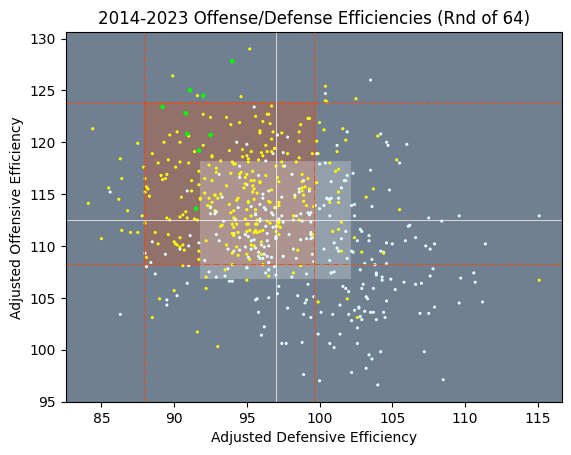

In [11]:
plotScatter(df=pastR1, rnd=1, rndTitle="Rnd of 64")

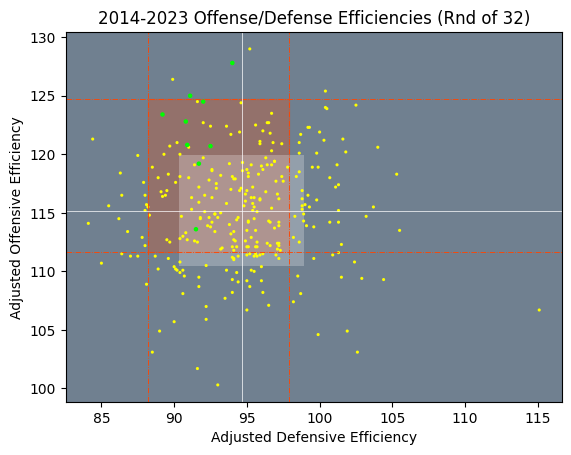

In [13]:
plotScatter(df=pastR2, rnd=2, rndTitle="Rnd of 32")

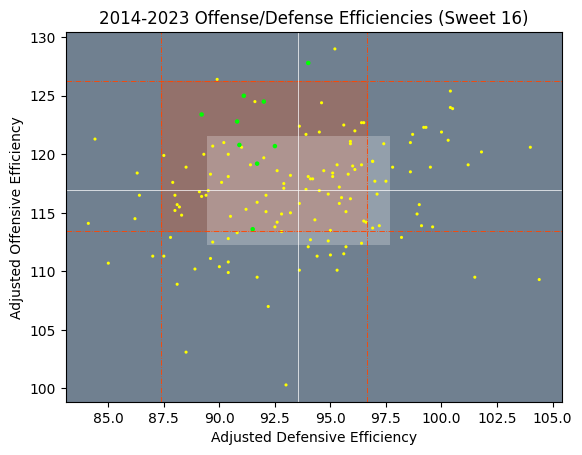

In [16]:
plotScatter(df=pastR3, rnd=3, rndTitle="Sweet 16")

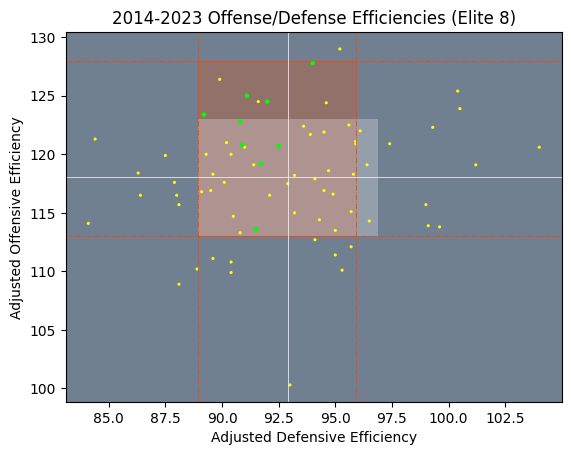

In [17]:
plotScatter(df=pastR4, rnd=4, rndTitle="Elite 8")

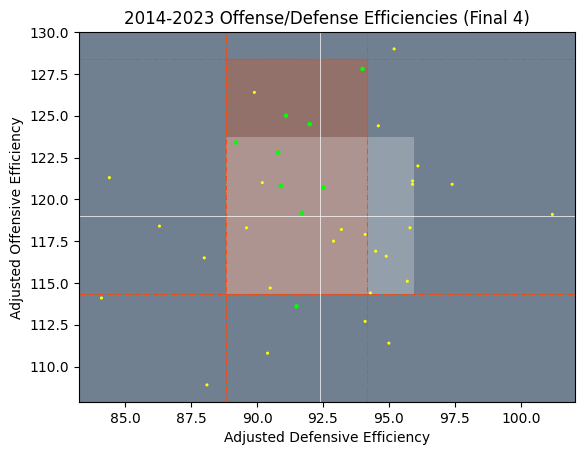

In [18]:
plotScatter(df=pastR5, rnd=5, rndTitle="Final 4")

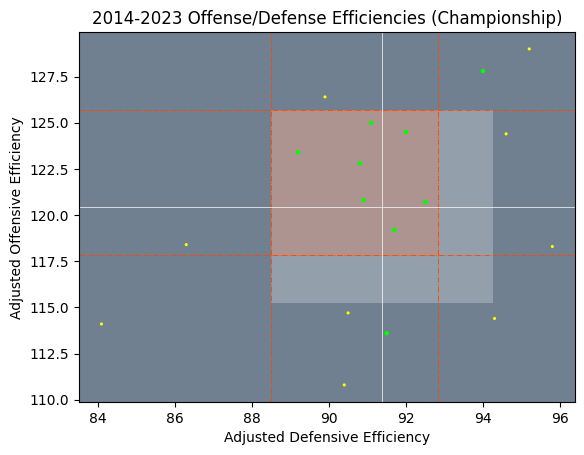

In [19]:
plotScatter(df=pastR6, rnd=6, rndTitle="Championship")

In [26]:
def plotTrny24Scatter(df, rnd, rndTitle):
    dAvg, _, oAvg, _ = calcRndStats(df)
    xMinB, xMaxB, yMinB, yMaxB = calcBaselineStats(df)
    xMinSc, xMaxSc, yMinSc, yMaxSc = calcScopedStats(df, rnd=rnd)

    _, ax = plt.subplots()

    ax.set_facecolor("slategray")
    ax.set_title(f"2014-2023 Offense/Defense Efficiencies ({rndTitle})")
    ax.set_xlabel("Adjusted Defensive Efficiency")
    ax.set_ylabel("Adjusted Offensive Efficiency")

    ax.axvline(x=(xMinSc), color="orangered", linestyle="-.", linewidth=0.625)
    ax.axvline(x=(xMaxSc), color="orangered", linestyle="-.", linewidth=0.625)
    ax.axhline(y=(yMinSc), color="orangered", linestyle="-.", linewidth=0.625)
    ax.axhline(y=(yMaxSc), color="orangered", linestyle="-.", linewidth=0.625)
    ax.fill_between(
        x=[xMinSc, xMaxSc],
        y1=yMinSc,
        y2=yMaxSc,
        color="orangered",
        alpha=0.25,
    )

    ax.axvline(x=dAvg, color="white", linestyle="-", linewidth=0.5)
    ax.axhline(y=oAvg, color="white", linestyle="-", linewidth=0.5)
    ax.fill_between(
        x=[xMinB, xMaxB],
        y1=yMinB,
        y2=yMaxB,
        color="white",
        alpha=0.25,
        linewidth=0,
    )

    ax.scatter(
        df["ADE"],
        df["AOE"],
        c=["lime" if x <= 8 else "tomato" for x in df["seed"]],
        s=20,
    )

    for _, point in df.iterrows():
        ax.text(
            point["ADE"] - 0.125,
            point["AOE"] + 0.25,
            point["seed"],
            fontsize=8,
            ha="right",
            va="bottom",
            c="white",
        )

    for _, point in df.iterrows():
        ax.text(
            point["ADE"] + 0.125,
            point["AOE"] + 0.25,
            point["team"],
            fontsize=8,
            ha="left",
            va="bottom",
            c="white",
        )

    return plt.show()

In [23]:
trny24 = pd.read_csv("../data/TourneyTeams/KenpomStats/trnyKenpom24.csv")

In [24]:
trny24East = trny24[trny24["hostReg"] == "East"]
trny24West = trny24[trny24["hostReg"] == "West"]
trny24South = trny24[trny24["hostReg"] == "South"]
trny24Midwest = trny24[trny24["hostReg"] == "Midwest"]

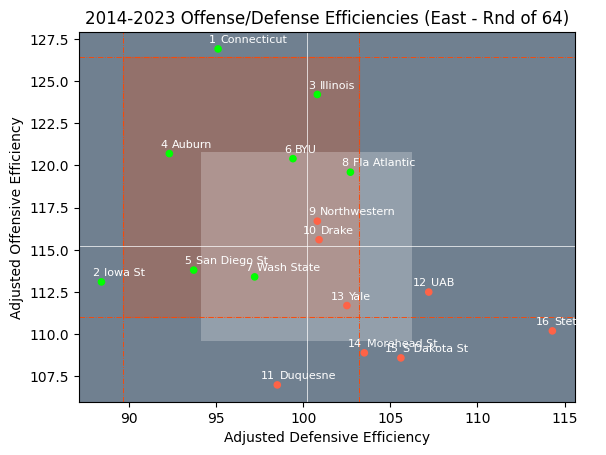

In [27]:
plotTrny24Scatter(df=trny24East, rnd=1, rndTitle="East - Rnd of 64")

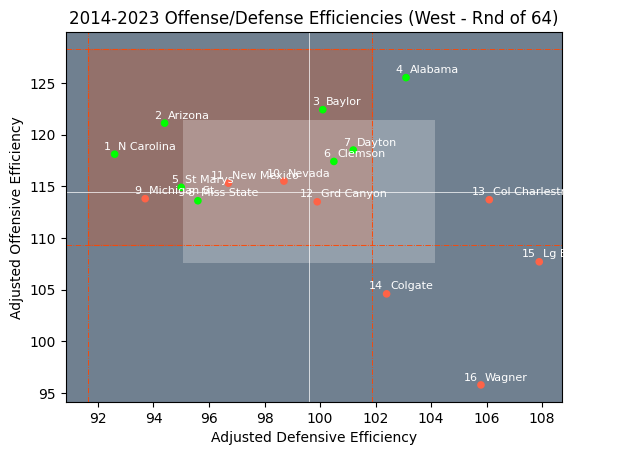

In [28]:
plotTrny24Scatter(df=trny24West, rnd=1, rndTitle="West - Rnd of 64")

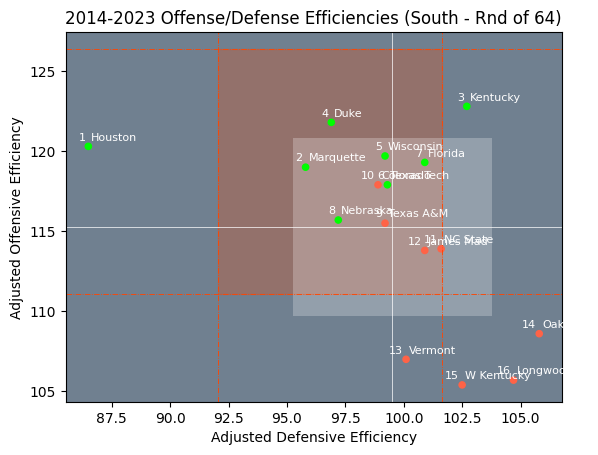

In [29]:
plotTrny24Scatter(df=trny24South, rnd=1, rndTitle="South - Rnd of 64")

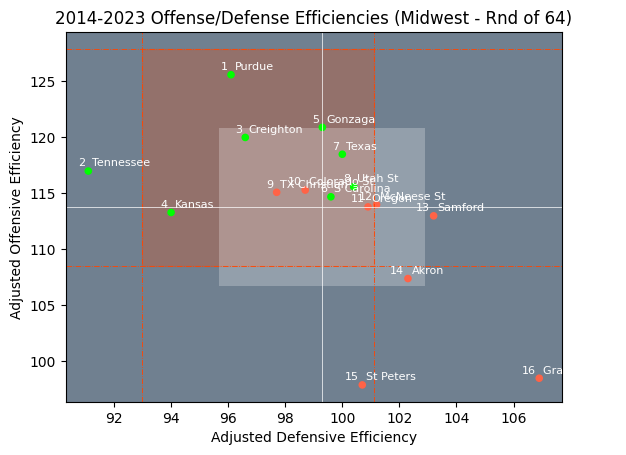

In [30]:
plotTrny24Scatter(df=trny24Midwest, rnd=1, rndTitle="Midwest - Rnd of 64")